In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.express as px
import plotly.io as pio

In [3]:
df = pd.read_csv("Netflix.csv")

I found this dataset on Kaggle (URL: https://www.kaggle.com/datasets/shivamb/netflix-shows) it is a fan favorite for data science projects and cinema enthusiasts like myself, so I decided this would be perfect to use. The file size is 1 MB and has 12 columns made up of 10 strings, 1 integer, and 1 date/time. I added a few columns for some particular visuals I wanted to create such as a time series bar chart which needed "year added" as a column. 


The column names and types are:



**show_id: s# of the row its in**

**type: Movie or TVShow**

**title: Title of Movie or TVShow**

**director: Director of Movie or TVShow**

**cast: Featured cast**

**country: Country of production**

**date_added: Date added to netflix**

**release_year: Year released**

**rating: Rating, i.e PG-13, R, etc.**

**duration: Duration**

**listed_in: What subjects you can find it in on Netflix**

**desctiption: Description of Movie or TVShow**


**And I added:**

**year_added: Year added to Netflix**

# Cleaning and EDA

In [5]:
df.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...


In [6]:
print(df.shape) # Before dropping NaN values

(8807, 12)


In [8]:
print(df.isnull().sum)

<bound method DataFrame.sum of       show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False   True    False       False   
1       False  False  False      True  False    False       False   
2       False  False  False     False  False     True       False   
3       False  False  False      True   True     True       False   
4       False  False  False      True  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8802    False  False  False     False  False    False       False   
8803    False  False  False      True   True     True       False   
8804    False  False  False     False  False    False       False   
8805    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            F

In [9]:
clean_df = df.dropna()

In [10]:
clean_df.shape

(5332, 12)

In [13]:
clean_df["date_added_format"] = pd.to_datetime(clean_df["date_added"])

/Users/yousefahmad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
clean_df["year_added"] = clean_df["date_added_format"].dt.year #Year added to netflix is now its own variable and can be used for visualization

/Users/yousefahmad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
clean_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_format,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,2021


# Histogram of Show Duration in Seasons

/Users/yousefahmad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


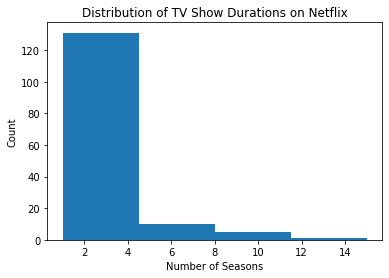

In [30]:
tv_shows = clean_df[clean_df['type'] == 'TV Show']
tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(int)
plt.hist(tv_shows['duration'], bins=4)
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.title('Distribution of TV Show Durations on Netflix')
plt.show()

While this visual may look uneventful, it is very telling. There are many shows on netflix with just 1 season, and there are even some with up to 14. This is something an enthusiast would likely find extremely cool and insightful. In order to extract the number from the duration column and not the word "Season" I had to use some text mining-esque code seen above using regex

# Wordcloud of Most Common Directors

In [42]:
from wordcloud import WordCloud

director_counts = tv_shows.groupby('director').count()['show_id']
director_dict = dict(director_counts)

In [47]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='purple', 
                min_font_size = 10)
wordcloud.generate_from_frequencies(frequencies=director_dict)

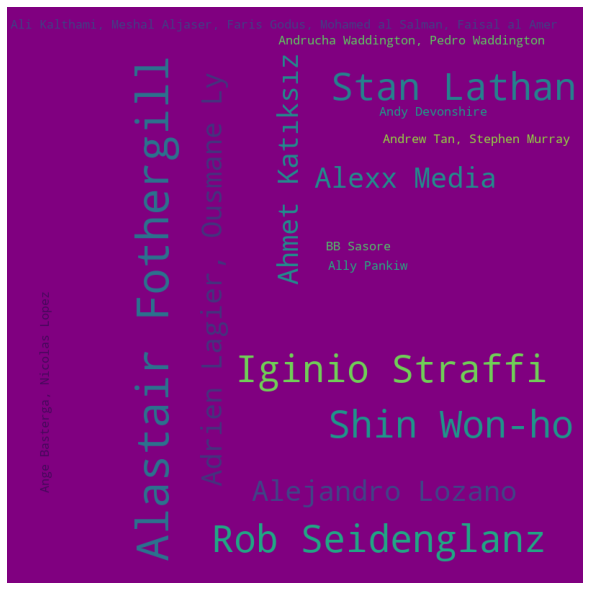

In [48]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

This is a fun word cloud that depicts the most common directors for the netflix films in the dataset. Do you see your favorite director up there?

# Wordcloud of Most Common Cast Members

In [62]:
tv_shows = clean_df[clean_df['type'] == 'TV Show']
tv_shows = tv_shows.dropna(subset=['cast'])
tv_shows['cast'] = tv_shows['cast'].str.split(', ')

cast_count = {}

for cast_list in tv_shows['cast']:
    for cast_member in cast_list:
        if cast_member in cast_count:
            cast_count[cast_member] += 1
        else:
            cast_count[cast_member] = 1

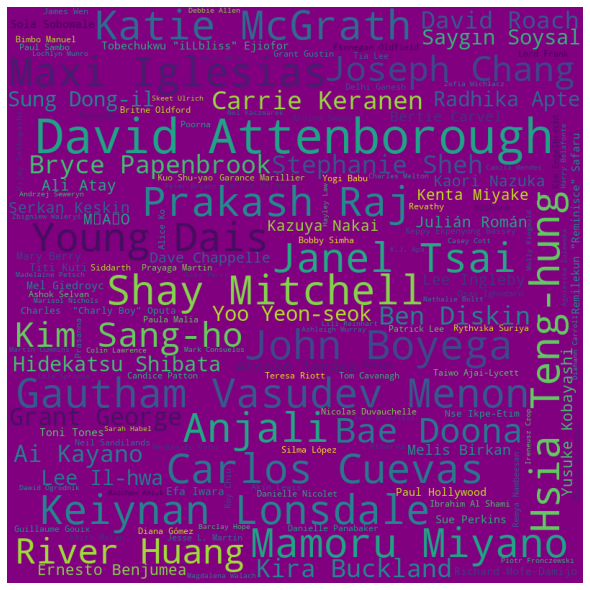

In [65]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='purple', 
                min_font_size = 10).generate_from_frequencies(cast_count)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

We cant do directors without doing cast members as well! I like this one more because it has a lot more names and there are some recognizable names.